In [121]:
import pandas as pd
import numpy as np
import sklearn
from io import StringIO
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [122]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [123]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [ 0., 11., 12., nan]])

In [124]:
df.dropna() #刪掉有NAN的列  

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [125]:
df.dropna(axis=1) #刪掉有NAN的行

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [126]:
from sklearn.impute import SimpleImputer #插補技術，語法改成SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')#將NAN值填補為行平均
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

C:\Users\Ray\anaconda3\envs\test\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [ 0. , 11. , 12. ,  6. ]])

In [127]:
import pandas as pd #建立數據框(DataFrame)
df = pd.DataFrame([
            ['green', 'M' , 10.1 , 'class1'],
			['red'  , 'L' , 13.5 , 'class2'],
			['blue' , 'XL', 15.3 , 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel'] #建立欄位名稱，color為名目特徵，size為有序特徵
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [128]:
size_mapping = {
                'XL':3,
				'L':2,
                'M':1}
df['size'] = df['size'].map(size_mapping) #將字串轉為整數數值
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [129]:
import numpy as np
class_maping = {label:idx for idx, label in 
                enumerate(np.unique(df['classlabel']))}
class_maping

df['classlabel'] = df['classlabel'].map(class_maping) #用對應字典將類別標籤換成整數
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [130]:
from sklearn.preprocessing import LabelEncoder #可直接完成上一段的工作
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [131]:
x = df [['color', 'size', 'price']].values #把顏色轉為編碼
color_le = LabelEncoder()
x[:, 0] = color_le.fit_transform(x[:, 0]) #這邊:應該是從頭到尾，阿第0個column
x #blue->0, green->1, red->2 這樣結果不會很好，因為顏色本身沒有大小之分

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [132]:
#改用sklearn.preprocessing中的OneHotEncoder(獨熱編碼
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#categorical_features用來定義希望轉換之變數的行位置
ohe = OneHotEncoder(categories='auto')#ohe = OneHotEncoder(categorical_features=[0])改掉了
ohe.fit_transform(x).toarray() #將預設回傳的稀疏矩陣轉為Numpy陣列

#使用pandas套件get_dummies應用在DataFrame，就只有字串數據被轉換
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [133]:
#降低數據集的維數
#利用pandas函式庫讀取178個葡萄酒樣本(3種類別/13個特徵值)
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label','Alcohole','Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenoles', 'Flavanoids', 'Nonflavanoid phenoles', 'Proanthocyanins', 'Color intensity',
				   'Hue', 'OD280/OD315 of diluted wines', 'Proline'] #記得連網路才能下載!!
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()
from sklearn.model_selection import train_test_split

#iloc是pandas提取數據方法，前面提取所有Row，x從第1項到最後項(共13個column的特徵)，後面則是提取所有Row的類別標籤存到y(所有樣本的第0項)
x, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values 
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.3, random_state=0)
print('train.shape:',x_train.shape)
print('test.shape:',x_test.shape)

Class labels [1 2 3]
train.shape: (124, 13)
test.shape: (54, 13)


In [134]:
#特徵縮放為預處理的關鍵(Feature Scaling)(決策樹、隨機森林除外)
# 正規化又分: 1.normalization使參數範圍限制在[0,1]縮放 、 2.standardization使參數呈現高斯分布，使平均值=0、標準差=1
#//------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler #每個特徵中的最小值變成了0，最大值變成了1。數據會縮放到到[0,1]之間。
mms = MinMaxScaler() #最小-最大
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

print('原資料集 X 的最小值 : \t', x_train.min(axis=0)[:5]) #抓一下前5個看看
print('原資料集 X 的最大值 : \t', x_train.max(axis=0)[:5])
print('normalization 縮放過後訓練集的最小值 \t: ', x_train_norm.min(axis=0)[:5])
print('normalization 縮放過後訓練集的最大值 \t: ', x_train_norm.max(axis=0)[:5],end='\n')
print('\n原測試集 X 的最小值 : \t', x_test.min(axis=0)[:5])
print('原測試集 X 的最大值 : \t', x_test.max(axis=0)[:5])
print('ormalization X 的最小值 : \t', x_test_norm.min(axis=0)[:5])
print('normalization X 的最大值 : \t', x_test_norm.max(axis=0)[:5])

原資料集 X 的最小值 : 	 [11.03  0.89  1.36 10.6  70.  ]
原資料集 X 的最大值 : 	 [ 14.75   5.65   3.22  30.   162.  ]
normalization 縮放過後訓練集的最小值 	:  [0. 0. 0. 0. 0.]
normalization 縮放過後訓練集的最大值 	:  [1. 1. 1. 1. 1.]

原測試集 X 的最小值 : 	 [11.41  0.74  1.7  14.   78.  ]
原測試集 X 的最大值 : 	 [ 14.83   5.8    3.23  28.5  132.  ]
ormalization X 的最小值 : 	 [ 0.10215054 -0.03151261  0.1827957   0.17525773  0.08695652]
normalization X 的最大值 : 	 [1.02150538 1.03151261 1.00537634 0.92268041 0.67391304]


In [149]:
#用StandardScaler呈現高斯分布，使平均值=0、標準差=1，讓離群值不那敏感(Logistic、SVM會用)
from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)#我們會對訓練集做StandardScaler
x_test_std = stdsc.transform(x_test)#也會對測試集、[不曾見過的數據]做StandardScaler

#高度適合，是產生了過度複雜的模型，導致訓練集表現很好，測試集卻很差，所以需要選取有意義的特徵
#方法有:1.蒐集更多訓練集2.經由[正規化]對過於複雜模型做成罰3.以較少參數做出較簡單的模型4.減少數據維度

#L1正規化:產生稀疏的特徵向量，大多數特徵值w會=0，表示如果數據集維度很高，又有許多不相關的特徵，則可達到降維效果
'''
我想法，先看L2收縮:
可以參考重寫後的[邏輯斯回歸的正規化成本函數](就是加上正規項而已)，
只要調整C就可以改變J的大小(看圖得知C越小w被正規化的越小，這邊觀念很重要)，而最後項有一個被加上的正規項，若w越大所加上的懲罰越大，
借以達到讓整體權重變小的目的，有點像是今天w1=3,w2=2可以很完美的區分測試集，使J=1好了，那我想讓w1和w2更小，
我調整C讓C很小，使得J=0.5(比1還小)，這樣就達到w1和w2變小的目的了，因為只要w1或w2其中一個太大就會有懲罰，導致J很大，
有點像把一個目標函數J要小分成兩個目標(很像PSO鳥群，同時要沿牆近+又要走的距離遠)，現在狀況則是[要同時高度適合+又要w1和w2都很小]，
因為很難同時達到兩個需求，所以會被折中掉的感覺，借而達到解決高度適合化的問題，然而實際上卻不是兩個目標，
所以會以新的cost function進行梯度下降找到最小的J值，回頭直觀一點看，C越小達到J小、w1和w2也越小。
'''
print('資料集 X 的平均值 : ', x_train.mean(axis=0)[:5])
print('資料集 X 的標準差 : ', x_train.std(axis=0)[:5])
print('StandardScaler 縮放過後訓練集的平均值 : ', x_train_std.mean(axis=0)[:5])
print('StandardScaler 縮放過後訓練集的標準差 : ', x_train_std.std(axis=0)[:5])
print('\n測試集 X 的平均值 : ', x_test.mean(axis=0)[:5])
print('測試集 X 的標準差 : ', x_test.std(axis=0)[:5])
print('StandardScaler 縮放過後測試集的平均值 : ', x_test_std.mean(axis=0)[:5])
print('StandardScaler 縮放過後測試集的標準差 : ', x_test_std.std(axis=0)[:5])

資料集 X 的平均值 :  [ 12.98306452   2.38370968   2.36314516  19.52580645 100.08870968]
資料集 X 的標準差 :  [ 0.79810176  1.132103    0.27526048  3.56510578 14.60005087]
StandardScaler 縮放過後訓練集的平均值 :  [ 2.89016123e-15 -1.25560404e-15  1.14514133e-15  2.56246637e-15
 -3.25904178e-16]
StandardScaler 縮放過後訓練集的標準差 :  [1. 1. 1. 1. 1.]

測試集 X 的平均值 :  [13.04092593  2.22759259  2.37425926 19.42407407 98.94444444]
測試集 X 的標準差 :  [ 0.8338249   1.06333148  0.26949611  2.7134736  13.35056757]
StandardScaler 縮放過後測試集的平均值 :  [ 0.07249879 -0.13790007  0.04037666 -0.02853558 -0.07837406]
StandardScaler 縮放過後測試集的標準差 :  [1.04476013 0.9392533  0.97905849 0.76112008 0.91441925]


In [146]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1') #簡單設定penality為l1，就可以產生稀疏
#透過L1正規化的邏輯斯回歸，於標準化後的葡萄酒數據集將產生以下稀疏解
lr = LogisticRegression(C=1, penalty='l1', solver='liblinear')
lr.fit(x_train_std,y_train)
print('Training accuracy : ', lr.score(x_train_std,y_train))
print('Test accuracy : ', lr.score(x_test_std, y_test)) #準確度都很高，表示無高度適合現象
lr.intercept_ #看截距項w0

Training accuracy :  0.9919354838709677
Test accuracy :  1.0


array([-1.45879471, -1.37750602, -2.06919618])

In [147]:
lr.coef_ #w1~wj係數屬性查看

array([[ 1.28111388,  0.21406072,  0.66217711, -1.24891829,  0.        ,
         0.        ,  0.94514901,  0.        ,  0.        ,  0.        ,
         0.        ,  0.97067515,  2.05963923],
       [-0.93583194, -0.58344186, -0.93596363,  0.46625055,  0.        ,
         0.        ,  0.        ,  0.03982771,  0.4935696 , -2.45424655,
         1.01661139,  0.        , -2.17667299],
       [ 0.        ,  0.20732313,  0.35352978,  0.        ,  0.        ,
         0.        , -2.09999528,  0.        ,  0.        ,  1.99370715,
        -0.65662652, -0.89839475,  0.        ]])

In [138]:
import matplotlib.pyplot as plt
fig = plt.figure
#ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
          'pink','lightgreen', 'lightblue', 'gray', 'indigo', 'orange' ]
weights,params = [],[]
for c in np.arange(-4,6, dtype=float):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr = LogisticRegression(C=10**c, random_state = 0)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
weights

array([[-4.22955774e-03, -1.87036630e-03, -2.15146551e-03,
         1.20433161e-03, -1.16252770e-03, -5.08276404e-04,
         9.56279976e-05, -8.12841916e-05,  5.38569830e-04,
        -4.26295800e-03,  2.13065718e-03,  1.34773684e-03,
        -3.40197490e-03],
       [-3.83412867e-02, -1.70666925e-02, -1.96153097e-02,
         1.11201651e-02, -1.01580788e-02, -4.29210007e-03,
         1.17306272e-03, -7.98728442e-04,  5.47255855e-03,
        -3.86030788e-02,  1.94006967e-02,  1.23227011e-02,
        -3.10280576e-02],
       [-2.00578574e-01, -9.04493195e-02, -1.08386269e-01,
         6.82750687e-02, -4.17572359e-02, -1.69870208e-02,
         1.20481456e-02, -7.12444995e-04,  4.52576970e-02,
        -1.99532699e-01,  1.02746781e-01,  6.25491300e-02,
        -1.72026615e-01],
       [-4.68390234e-01, -2.42430203e-01, -3.21227137e-01,
         2.33730986e-01, -6.65887434e-02, -2.62066637e-02,
         6.13668907e-02,  3.08235167e-02,  1.64475096e-01,
        -4.93788174e-01,  2.81359622e

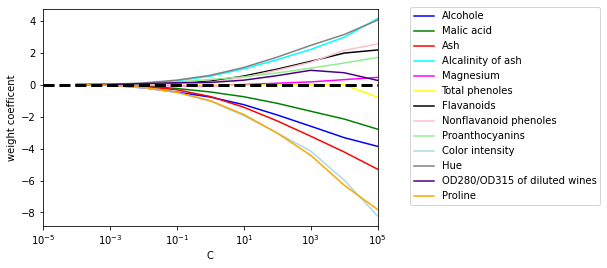

In [139]:
for column, color in zip(range(weights.shape[1]), colors): #查看weights的個數維度(13個)，並和顏色結合
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1],color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficent')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
plt.legend(loc='upper center',bbox_to_anchor=(1.38,1.03),ncol=1, fancybox=True)
plt.show()